In [1]:
import pandas as pd
import numpy as np

In [2]:
#일반적인 경고 메세지는 무시함
import warnings
warnings.filterwarnings("ignore")

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
plt.style.use('seaborn') 
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [58]:
#데이터 불러오기
df = pd.read_csv('Mall_Customers.csv')

### 데이터 설명<br>

CustomerID : 고유ID  <br>
Gender : 고객의 성별 <br>
Age	: 고객의 나이 <br>
Annual Income (k$) : 연간소득 <br>
Spending Score (1-100) : 고객 행동 및 지출 특성에 따라 쇼핑몰에서 할당한 점수

In [16]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
#데이터 구조확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
#결측치확인
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [59]:
#custpmerID는 중요하지 않은 변수라 판단하여 변수제거를 하였다.
df = df.drop('CustomerID',axis=1)

In [60]:
#문자형데이터를 변환시켜주기 위해 몇개의 값들이 들어있는지 확인한다.
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [61]:
#데이터변환
df['Gender'].replace({'Male':0,'Female':1},inplace=True)

In [62]:
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


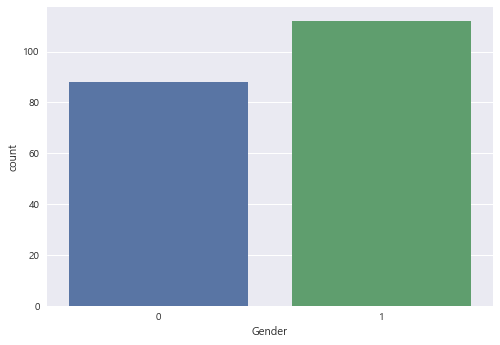

In [26]:
#성비가 어떻게 구성되어있는지 궁금하여 시각화해보았다
sns.countplot('Gender',data=df)
plt.show()

* 여자가 더 많음을 알 수 있다.

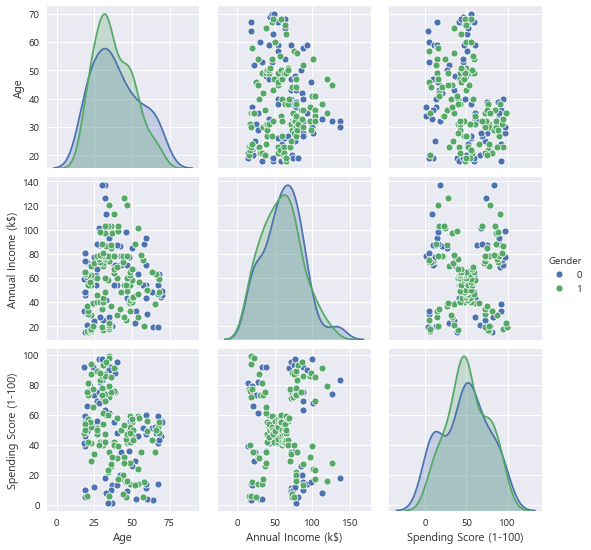

In [21]:
#성별로 전체데이터를 시각화해보았다.
sns.pairplot(df, hue='Gender')
plt.show()

## K-means Clustering

K-means : 데이터의 어떤 영역을 대표하는 클러스터 중심(cluster center)을 찾는 알고리즘으로 가장 간단하고 널리 사용된다.
* 데이터 포인트를 가장 가까운 클러스터 중심에 할당
* 클러스터에 할당된 데이터 포인트의 평균으로 클러스터 중심을 다시 지정
* 클러스터에 할당되는 데이터 포인트에 변화가 없을 때 알고리즘 종료

주요변수 : centroid, K
* centroid : 초기 군집 중심점 설정
* K : 군집의 개수 

#### K-means를 사용하기 전에 2차원으로 차원을 축소시키는 PCA(주성분분석)를 진행하였다.

In [63]:
from sklearn.decomposition import PCA

In [64]:
pca = PCA(n_components=2) #2차원으로 축소
pca_df = pca.fit_transform(df)
principalDf = pd.DataFrame(data = pca_df
             , columns = ['principal component 1', 'principal component 2'])

principalDf 

,principal component 1,principal component 2
0,-31.869945,-33.001252
1,0.764494,-56.842901
2,-57.408276,-13.124961
3,-2.168543,-53.478590
4,-32.174085,-30.388412
...,...,...
195,58.352515,31.017542
196,19.908001,66.446108
197,58.520804,38.346039
198,20.979130,79.376405


In [65]:
from sklearn.cluster import KMeans

Text(0.5, 1.0, 'Elbow curve')

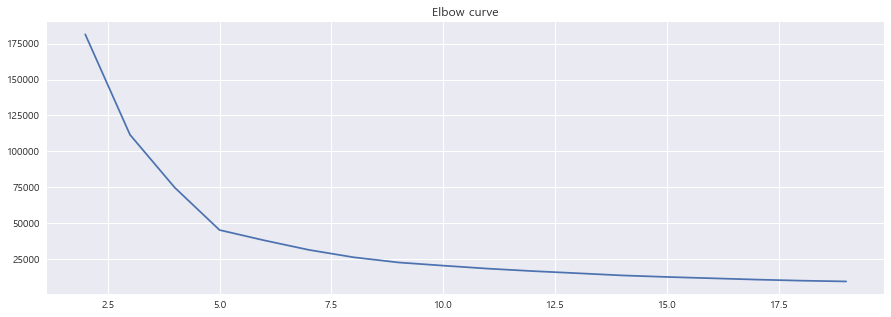

In [66]:
#군집의 개수를 정하기위해 Elbow curve를 그려본다
distorsions = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_df)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

* 군집의 개수가 5개일때가 제일 적당하다고 판단, k=5로 지정하여 군집을 실행한다.

In [102]:
model = KMeans(n_clusters=5,algorithm='auto')
model.fit(pca_df)

KMeans(n_clusters=5)

In [103]:
#silhouette_score로 평가하기 위해서 label을 만들어 주성분분석한 df에 합친다.
pca_df = pd.DataFrame(pca_df)
label = pd.DataFrame(model.predict(pca_df))
label.columns=['label']

df2 = pd.concat([pca_df,label],axis=1)

#### 평가지표

* Silhoutte : 개체별로 그 적합성이 평가한다. 즉, 모든 개체의 Silhoutte값을 확인하고, 클러스터별로 그 값의 분포에 문제가 없는지 확인하는 방식으로, 해당 클러스터의 유효성 검증한다. 
* -1과 1사이의 값을 가지며 1에 가까울수록 올바른 군집에, -1에 가까울수록 잘못된 군집에 분류된 것이다.
* 일반적으로 silhoutte 값이 0.5보다 크면, 클러스터링이 잘 된거라고 평가한다고 한다. <br>
https://frhyme.github.io/python-lib/clustering_evaluation/

silhouette_score: 0.553


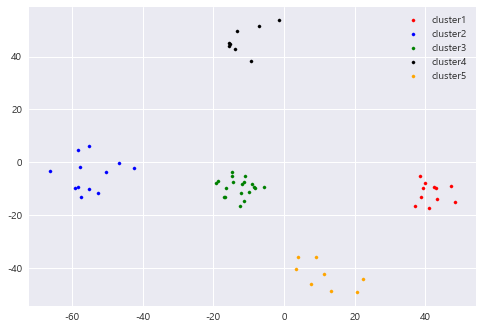

In [124]:
plt.scatter(principalDf.iloc[kmeans.labels_ == 0, 0], principalDf.iloc[kmeans.labels_ == 0, 1], s = 10, c = 'red', label = 'cluster1')
plt.scatter(principalDf.iloc[kmeans.labels_ == 1, 0], principalDf.iloc[kmeans.labels_ == 1, 1], s = 10, c = 'blue', label = 'cluster2')
plt.scatter(principalDf.iloc[kmeans.labels_ == 2, 0], principalDf.iloc[kmeans.labels_ == 2, 1], s = 10, c = 'green', label = 'cluster3')
plt.scatter(principalDf.iloc[kmeans.labels_ == 3, 0], principalDf.iloc[kmeans.labels_ == 3, 1], s = 10, c = 'black', label = 'cluster4')
plt.scatter(principalDf.iloc[kmeans.labels_ == 4, 0], principalDf.iloc[kmeans.labels_ == 4, 1], s = 10, c = 'orange', label = 'cluster5')
plt.legend()

print('silhouette_score: {:.3f}'.format(silhouette_score(df2.iloc[:,:2], df2['label'])))

* 보기에도 군집화가 잘되었고 silhouette_score도 0.553으로 괜찮게 나온것을 확인할 수 있다. 

## Hierarchical Clustering

Hierarchical clustering (계층적 군집 분석) : 비슷한 군집끼리 묶어 가면서 최종적으로 하나의 케이스가 될때까지 군집을 묶는 알고리즘

* 군집간의 거리를 기반으로 클러스터링을 하는 알고리즘
* K Means와는 다르게 군집의 수를 미리 정해주지 않아도 된다.

군집간의 거리 측정방법
* single : 거리가 가장 작은거 끼리 측정
* complete : 거리가 가장 멀은거 끼리 측정
* average : 모든 거리를 평균을 내어서 측정
* centroid : 군집들의 중심점끼리의 거리 측정
* ward : 군집간,군집내의 제곱합을 이용하여 거리 측정

In [27]:
from scipy.cluster.hierarchy import linkage, dendrogram

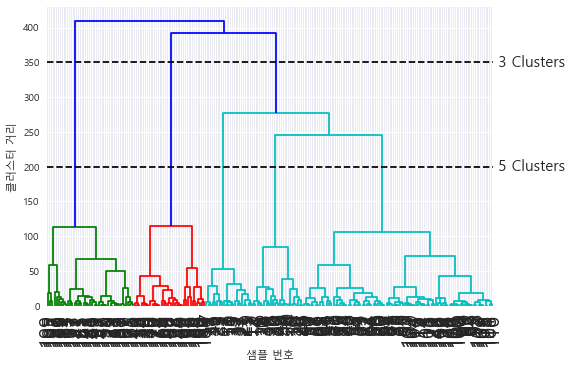

In [112]:
mergings = linkage(pca_df, method='ward')
dendrogram(mergings,
            leaf_rotation=90,
            leaf_font_size=20)

plt.xlabel("샘플 번호")
plt.ylabel("클러스터 거리")

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [350, 350], '--', c='k')  # 3개의 클러스터가 생기는 지점
ax.plot(bounds, [200, 200], '--', c='k')  # 5개의 클러스터가 생기는 지점
ax.text(bounds[1], 350, ' 3 Clusters ', va='center', fontdict={'size': 15})
ax.text(bounds[1], 200, ' 5 Clusters ', va='center', fontdict={'size': 15})

plt.show()

* 5개의 군집으로 나누었을때가 가장 적절하게 보인다.

## DBSCAN

DBSCAN(density-based spatial clustering of applications with noise) : 밀도 기반 클러스터링

* 클러스터의 개수를 미리 지정할 필요가 없다 
* 복잡한 형상도 찾을 수 있다.
* 어떤 클래스에도 속하지 않는 포인트를 구분할 수 있다. 
* 속도는 느리지만 비교적 큰 데이터셋에도 적용할 수 있다.

매개변수 : min_samples, eps
* eps 거리(기본값 euclidean) 안에 데이터가 min_samples 개수만큼 들어 있으면 이 데이터 포인트를 핵심 샘플로 분류
* eps보다 가까운 핵심 샘플은 동일한 클러스터로 합쳐진다.

In [96]:
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import silhouette_score

silhouette_score: -0.326


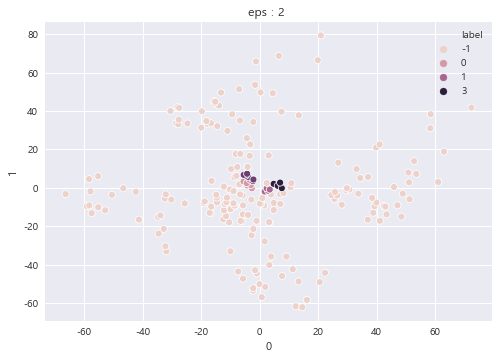

silhouette_score: 0.090


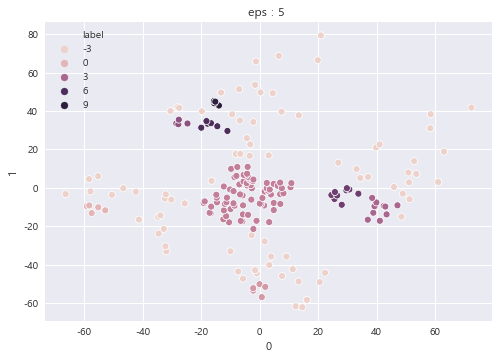

silhouette_score: 0.394


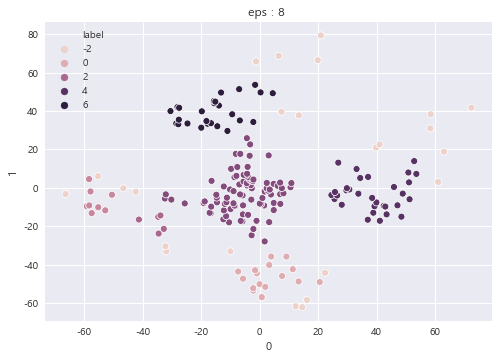

silhouette_score: 0.337


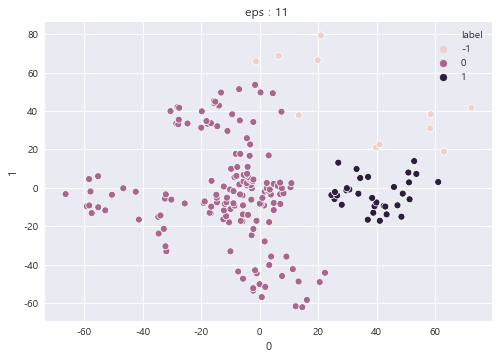

silhouette_score: 0.348


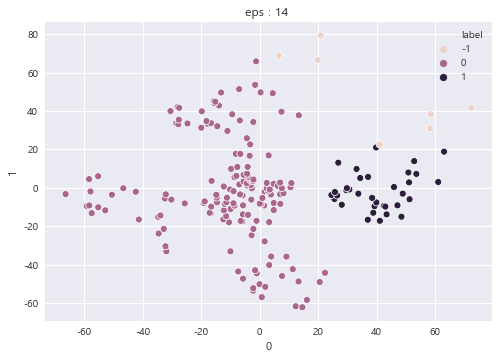

silhouette_score: 0.422


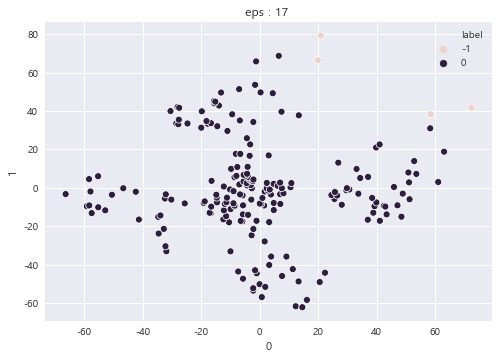

In [127]:
eps = list(range(2,20,3)) #에폭을 조절하여 시각화를 해보았다.
for i in eps:
    dbscan = DBSCAN(eps=i, min_samples=4) #min_samples를 바꿔가면서 돌려보았을때 4개가 가장 적절해보여 4개로 고정하였다.
    model = dbscan.fit(pca_df)
    label = pd.DataFrame(model.labels_)
    label.columns=['label']
    df3 = pd.concat([pca_df,label],axis=1)
    
    sns.scatterplot(df3[0],df3[1],hue = df3['label'])
    plt.title('eps : {} '.format(i))
    print('silhouette_score: {:.3f}'.format(silhouette_score(df3.iloc[:,:2], df3['label'])))
    plt.show()

* Silhouette score가 모두 0.5이상이 넘지 않아 군집화가 잘되었다고 판단할 수 없다.
* 그중에서 적절한 것을 고르자면, Silhouette score가 0.394인 eps = 8일때라고 할 수 있다.

## Mean-Shift

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html#sklearn.cluster.MeanShift <br>
https://michigusa-nlp.tistory.com/27

Mean-Shift :  data points의 가장 밀도 높은 지역을 찾으려고 하는 알고리즘이다. 
* centroid후보를 특정 지역 내 포인트의 평균으로 업데이트 하는 것으로 이루어진다.
* 후보는 중복되는 것을 제거하여 최종 centrioid집합을 형성한다.
* 클래스 혹은 그룹의 개수를 정할 필요없이 Mean-Shift가 자동적으로 발견한다.

In [126]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [146]:
bandwidth = estimate_bandwidth(pca_df)
bandwidth

33.20733434541711

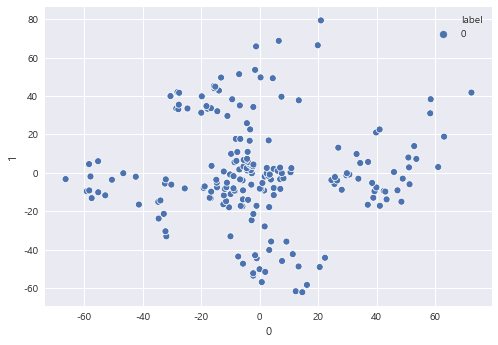

In [154]:
ms = MeanShift(bandwidth=bandwidth)
model = ms.fit(pca_df)
label = pd.DataFrame(model.labels_)
label.columns=['label']
df4 = pd.concat([pca_df,label],axis=1)
sns.scatterplot(d4[0],d4[1],hue = df4['label'])
plt.show()

* label이 한개로밖에 나눠지지 않는다. 